## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
# Create array from tabular Data using Numpy.genfromtxt() function

from numpy import genfromtxt
df = genfromtxt("RegData.csv",delimiter=",")
df

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Explore your data

In [3]:
df.shape

(13, 2)

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X, Y = genfromtxt("RegData.csv",delimiter=",", unpack=True)

#### Explore your data

In [8]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [9]:
Y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

In [10]:
print(X.mean())
print(Y.mean())

5.953846161076923
5.56923073976923


#### Plot the original data (scatter plot of X,y)

In [11]:
df = pd.DataFrame(df, columns=['X', 'Y'])
df

,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


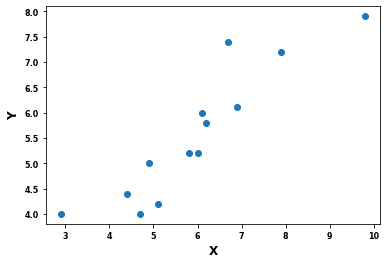

In [12]:
plt.scatter(data=df, x='X', y='Y');
plt.xlabel('X', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8, fontweight='bold');
plt.yticks(fontsize=8, fontweight='bold');
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

![image.png](attachment:image.png)

In [13]:
theta_0, theta_1 = 0, 0
L = 0.01   #The Learning Rate 

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.![image.png](attachment:image.png)
#### Note: you will need to iterate through all data points

In [38]:
hx = theta_0 + theta_1 * X

In [39]:
hx

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [51]:
m = len(X)
J = (1/2*m) * (np.sum((hx-Y)**2))

In [52]:
cost_func

2755.6099770680016

### Step4: Calculate the gradient.![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [57]:
GD_1 = (1/m) * (np.sum(hx - Y))
GD_2 = (1/m) * (np.sum((hx - Y) * X))

In [58]:
GD_1

-5.569230739769231

In [59]:
GD_2

-35.043846043215375

### Step5: Update the parameters (simultaneously).![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [64]:
theta_0 = theta_0 - L * GD_1
theta_1 = theta_1 - L * GD_2

In [65]:
theta_0

0.11027076864743077

In [66]:
theta_1

0.6938681516556645

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.![image.png](attachment:image.png)

In [67]:
epochs = 1000
cost = []
for i in range(epochs):
    hx = theta_0 + theta_1 * X
    J = (1/2*m) * (np.sum((hx-Y)**2))
    cost.append(J)
    GD_1 = (1/m) * (np.sum(hx - Y))
    GD_2 = (1/m) * (np.sum((hx - Y) * X))
    theta_0 = theta_0 - L * GD_1
    theta_1 = theta_1 - L * GD_2

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [69]:
pred_y = theta_0 + theta_1 * X

In [70]:
pred_y

array([3.09554099, 6.11788994, 4.68625108, 7.07231622, 8.58349088,
       6.27696117, 5.64067699, 5.72021242, 5.56114156, 4.84532194,
       4.52717985, 4.28857356, 5.4020707 ])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

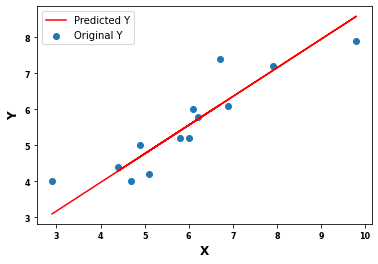

In [76]:
plt.scatter(data=df, x='X', y='Y', label='Original Y')
plt.plot(X, pred_y, label='Predicted Y', color='red')
plt.xlabel('X', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8, fontweight='bold');
plt.yticks(fontsize=8, fontweight='bold');
plt.legend();
plt.show();

#### Use R2 score to evaluate LR equation output
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
https://en.wikipedia.org/wiki/Coefficient_of_determination

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


### Repeat your implementation but for more than one variable

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

#### Use R2 score to evaluate LR equation output

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

#### Train the model (fit the model to the training data)

#### Predict y values using the trained model

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

#### Use R2 score to evaluate model output

### Repeat for Mulivariate